<a href="https://colab.research.google.com/github/Navathamarkeeri/PROJECT/blob/python/hospital_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Hospital Data.xlsx')

In [ ]:
df.head(13)

,Month,Beds_Available,No_of_Inpatients,Inpatient_Days,No_of_Deaths,Deaths_within_48hrs,Days_in_Month,Bed_Occupancy_Rate (%)
0,Jan'22,415.0,1320,7597,32,12,31,59.051691
8,Sep'22,620.0,2036,8872,27,9,30,47.698925


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/Hospital Data.xlsx')

# Inspect the column names to confirm structure
print(df.columns)

# Rename columns to match the dataset structure (adjust as necessary)
df.columns = [ 'Month', 'Beds_Available', 'No_of_Inpatients',
              'Inpatient_Days', 'No_of_Deaths', 'Deaths_within_48hrs']

# Define the number of days in each month
days_in_month = {
    "Jan'22": 31, "Feb'22": 28, "Mar'22": 31, "Apr'22": 30,
    "May'22": 31, "Jun'22": 30, "Jul'22": 31, "Aug'22": 31,
    "Sep'22": 30, "Oct'22": 31, "Nov'22": 30, "Dec'22": 31
}

# Map the number of days to the dataset
df['Days_in_Month'] = df['Month'].map(days_in_month)

# Remove rows with missing data in critical columns
df = df.dropna(subset=['Beds_Available', 'Inpatient_Days'])

# Calculate the Bed Occupancy Rate (BOR)
df['Bed_Occupancy_Rate (%)'] = (
    df['Inpatient_Days'] / (df['Beds_Available'] * df['Days_in_Month'])
) * 100

# Extract and display only the required columns
bor_data = df[['Month', 'Bed_Occupancy_Rate (%)']]
print(bor_data)


Index(['months', 'Beds_Available ', 'No of Inpatients ', 'Inpatient Days ',
       'No of Deaths ', 'No of Deaths within 48 hrs '],
      dtype='object')
    Month  Bed_Occupancy_Rate (%)
0  Jan'22               59.051691
8  Sep'22               47.698925


In [ ]:
# Ensure no critical data is missing for calculation
df = df.dropna(subset=['No_of_Inpatients', 'Inpatient_Days'])

# Calculate Average Length of Stay (ALOS)
df['Average_Length_of_Stay (ALOS)'] = df['Inpatient_Days'] / df['No_of_Inpatients']

# Extract and display the required columns
data = df[['Month', 'Average_Length_of_Stay (ALOS)']]
print(data)

    Month  Average_Length_of_Stay (ALOS)
0  Jan'22                       5.755303
8  Sep'22                       4.357564


In [ ]:
# Ensure no critical data is missing for calculation
df = df.dropna(subset=['No_of_Deaths', 'No_of_Inpatients'])

# Calculate Gross Death Rate (GDR)
df['Gross_Death_Rate (%)'] = (df['No_of_Deaths'] / df['No_of_Inpatients']) * 100

# Extract and display the required columns
data = df[['Month', 'Gross_Death_Rate (%)']]
print(data)

    Month  Gross_Death_Rate (%)
0  Jan'22              2.424242
8  Sep'22              1.326130


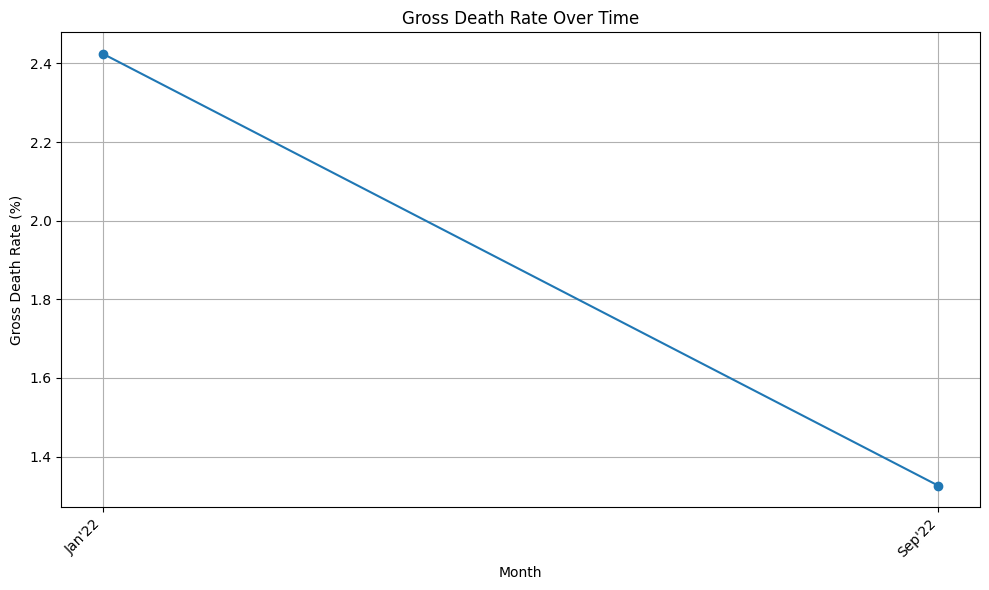

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' contains the 'Month' and 'Gross_Death_Rate (%)' columns
# Extract the month and Gross Death Rate for plotting
months = data['Month']
gross_death_rates = data['Gross_Death_Rate (%)']

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(months, gross_death_rates, marker='o', linestyle='-')

# Customize the plot
plt.title('Gross Death Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Gross Death Rate (%)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

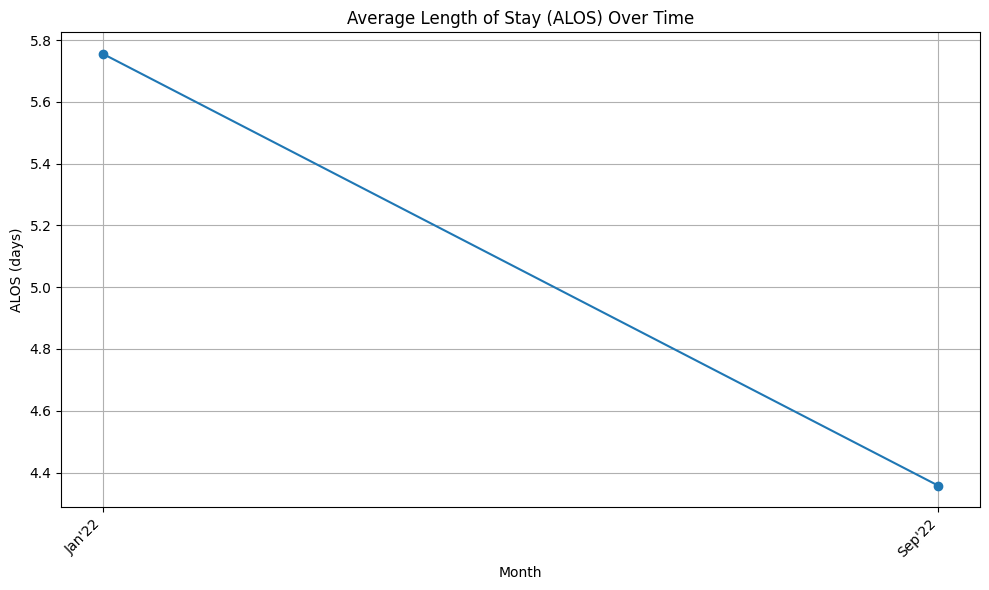

In [ ]:
import matplotlib.pyplot as plt

# Recalculate the Average Length of Stay (ALOS) and store it in a DataFrame named 'alos_data'
# Assuming 'df' is the original DataFrame containing the required columns

# Ensure no critical data is missing for calculation
df = df.dropna(subset=['No_of_Inpatients', 'Inpatient_Days'])

# Calculate Average Length of Stay (ALOS)
df['Average_Length_of_Stay (ALOS)'] = df['Inpatient_Days'] / df['No_of_Inpatients']

# Extract the required columns for ALOS into a new DataFrame
alos_data = df[['Month', 'Average_Length_of_Stay (ALOS)']]


# Now use 'alos_data' to extract the month and ALOS for plotting
months = alos_data['Month']
alos_values = alos_data['Average_Length_of_Stay (ALOS)']

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(months, alos_values, marker='o', linestyle='-')

# Customize the plot
plt.title('Average Length of Stay (ALOS) Over Time')
plt.xlabel('Month')
plt.ylabel('ALOS (days)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

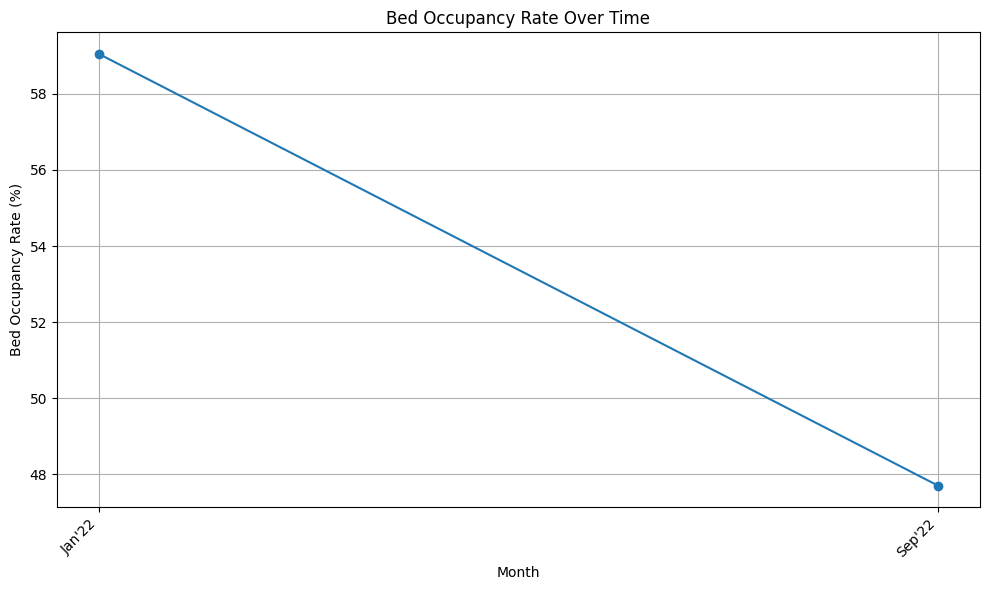

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your data loading, cleaning, and calculation code from above) ...

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['Month'], df['Bed_Occupancy_Rate (%)'], marker='o', linestyle='-')

# Customize the plot
plt.title('Bed Occupancy Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Bed Occupancy Rate (%)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# ... (Your data loading, cleaning, and calculation code from above) ...

# Calculate basic statistics for BOR
bor_stats = df['Bed_Occupancy_Rate (%)'].describe()
print(bor_stats)

# Identify months with highest and lowest BOR
highest_bor_month = df.loc[df['Bed_Occupancy_Rate (%)'].idxmax(), 'Month']
lowest_bor_month = df.loc[df['Bed_Occupancy_Rate (%)'].idxmin(), 'Month']
print(f"\nHighest BOR in: {highest_bor_month}")
print(f"Lowest BOR in: {lowest_bor_month}")

# You can further analyze trends by grouping data or comparing to benchmarks
# For example:
# - Calculate average BOR for different periods (quarters, seasons)
# - Compare BOR to industry standards or historical data

count     2.000000
mean     53.375308
std       8.027618
min      47.698925
25%      50.537116
50%      53.375308
75%      56.213499
max      59.051691
Name: Bed_Occupancy_Rate (%), dtype: float64

Highest BOR in: Jan'22
Lowest BOR in: Sep'22


In [ ]:
import pandas as pd

# ... (Your data loading, cleaning, and ALOS calculation code from above) ...

# Calculate basic statistics for ALOS
alos_stats = df['Average_Length_of_Stay (ALOS)'].describe()
print(alos_stats)

# Identify months with highest and lowest ALOS
highest_alos_month = df.loc[df['Average_Length_of_Stay (ALOS)'].idxmax(), 'Month']
lowest_alos_month = df.loc[df['Average_Length_of_Stay (ALOS)'].idxmin(), 'Month']
print(f"\nHighest ALOS in: {highest_alos_month}")
print(f"Lowest ALOS in: {lowest_alos_month}")

# Further analysis:
# - Group data by month or other categories to analyze trends
# - Compare ALOS to benchmarks or historical data
# - Investigate potential factors influencing ALOS (patient demographics, case mix)

count    2.000000
mean     5.056433
std      0.988351
min      4.357564
25%      4.706999
50%      5.056433
75%      5.405868
max      5.755303
Name: Average_Length_of_Stay (ALOS), dtype: float64

Highest ALOS in: Jan'22
Lowest ALOS in: Sep'22


In [ ]:
import pandas as pd

# ... (Your data loading, cleaning, and GDR calculation code from above) ...

# Calculate basic statistics for GDR
gdr_stats = df['Gross_Death_Rate (%)'].describe()
print(gdr_stats)

# Identify months with highest and lowest GDR
highest_gdr_month = df.loc[df['Gross_Death_Rate (%)'].idxmax(), 'Month']
lowest_gdr_month = df.loc[df['Gross_Death_Rate (%)'].idxmin(), 'Month']
print(f"\nHighest GDR in: {highest_gdr_month}")
print(f"Lowest GDR in: {lowest_gdr_month}")

# Further analysis:
# - Group data by month or other categories to analyze trends
# - Compare GDR to benchmarks or historical data
# - Investigate potential factors influencing GDR (patient demographics, case mix, severity of illness)


count    2.000000
mean     1.875186
std      0.776483
min      1.326130
25%      1.600658
50%      1.875186
75%      2.149714
max      2.424242
Name: Gross_Death_Rate (%), dtype: float64

Highest GDR in: Jan'22
Lowest GDR in: Sep'22


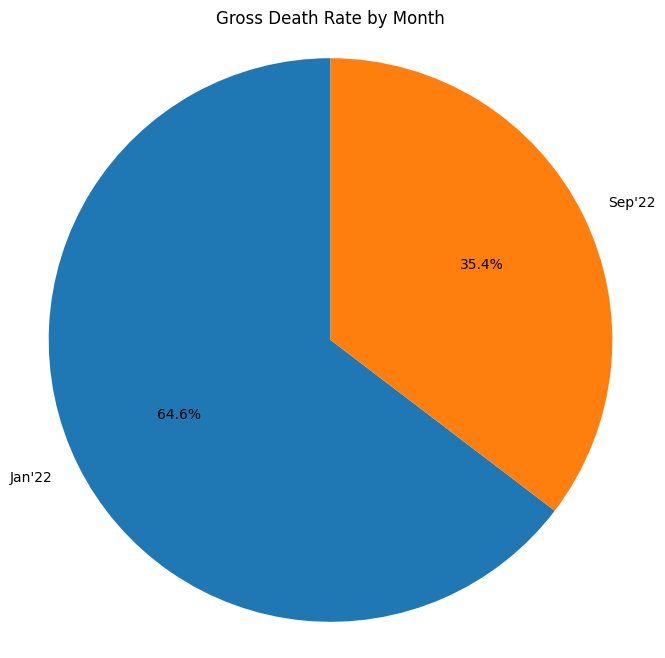

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your data loading, cleaning, and GDR calculation code from above) ...

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(data['Gross_Death_Rate (%)'], labels=data['Month'], autopct='%1.1f%%', startangle=90)
plt.title('Gross Death Rate by Month')

# Ensure the circle's proportion
plt.axis('equal')

# Show the pie chart
plt.show()